# Analysing Purchasing Patterns for Strategic Business Insights  

## Objective:

A retail company is looking to understand its customer’s purchasing behavior and demographic trends. The company has provided two datasets: purchase data (containing information about orders) and customer data (containing customer demographic details). The goal is to derive actionable insights from these datasets. You are tasked with analysing these datasets to answer key business questions and provide recommendations.

## Problem Statement:

The company wants to address the following business questions: 
1. Which products contribute the most to revenue, and how can discounts and shipping 
costs be optimised? 
2. Are there any patterns in customer demographics (age, income, and country) that 
influence purchasing behavior? 
3. Is there a significant difference in income or purchasing habits between genders? 
4. Can the shipping process be optimized by analysing shipping costs and durations? 
5. How strongly does customer income correlate with their purchasing behavior? 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
purchases = pd.read_csv('purchase.csv')
purchases.head(3)

,order_id,customer_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date
0,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,26-05-2020,9,8.91,29-05-2020
1,ODSHP00002,CS00002,Dress,Look and feel your best with this elegant dress.,28.90,0.05,0.02,29-12-2022,9,13.95,29-12-2022
2,ODSHP00003,CS00003,Furniture,Transform your space with this stylish and fun...,3536.49,0.21,0.04,06-03-2021,3,36.42,06-03-2021


In [49]:
customers = pd.read_csv('customer.csv')
customers.head()

,customer_id,first_name,last_name,gender,age,country,income
0,CS00001,Isadora,Porto,Female,19,Brazil,117196
1,CS00002,Hugo,Carreño,Male,33,Chile,49256
2,CS00003,René,Olivera,Male,65,Mexico,33434
3,CS00004,Luiz Henrique,Pinto,Male,55,Brazil,75302
4,CS00005,Leonardo,Monteiro,Male,19,Brazil,32280


## Understanding the Data

In [10]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       50000 non-null  object 
 1   customer_id    50000 non-null  object 
 2   product_name   50000 non-null  object 
 3   description    50000 non-null  object 
 4   price          50000 non-null  float64
 5   discount       50000 non-null  float64
 6   tax            50000 non-null  float64
 7   order_date     50000 non-null  object 
 8   quantity       50000 non-null  int64  
 9   shipping_cost  50000 non-null  float64
 10  shipping_date  50000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.2+ MB


In [23]:
purchases.describe()

,price,discount,tax,quantity,shipping_cost
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1275.926873,0.249116,0.050081,5.497560,27.509281
std,1315.400328,0.144386,0.029159,2.862313,12.952128
min,20.020000,0.000000,0.000000,1.000000,5.000000
25%,219.675000,0.120000,0.030000,3.000000,16.360000
50%,834.395000,0.250000,0.050000,5.000000,27.580000
75%,1837.397500,0.370000,0.080000,8.000000,38.670000
max,4999.950000,0.500000,0.100000,10.000000,50.000000


In [24]:
purchases.dtypes

order_id          object
customer_id       object
product_name      object
description       object
price            float64
discount         float64
tax              float64
order_date        object
quantity           int64
shipping_cost    float64
shipping_date     object
dtype: object

In [28]:
purchases.isnull().sum()

order_id         0
customer_id      0
product_name     0
description      0
price            0
discount         0
tax              0
order_date       0
quantity         0
shipping_cost    0
shipping_date    0
dtype: int64

In [39]:
purchases.duplicated().sum()

np.int64(0)

In [51]:
purchases.nunique()

order_id         50000
customer_id       1000
product_name        30
description         30
price            43611
discount            51
tax                 11
order_date        1236
quantity            10
shipping_cost     4501
shipping_date     1250
dtype: int64

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1001 non-null   object
 1   first_name   1001 non-null   object
 2   last_name    1001 non-null   object
 3   gender       1001 non-null   object
 4   age          1001 non-null   int64 
 5   country      1001 non-null   object
 6   income       1001 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.9+ KB


In [27]:
customers.describe()

,age,income
count,1001.000000,1001.000000
mean,41.337662,84628.809191
std,13.732657,37498.010417
min,18.000000,20205.000000
25%,29.000000,52092.000000
50%,41.000000,83654.000000
75%,53.000000,116549.000000
max,65.000000,149980.000000


In [26]:
customers.dtypes

customer_id    object
first_name     object
last_name      object
gender         object
age             int64
country        object
income          int64
dtype: object

In [40]:
customers.isnull().sum()

customer_id    0
first_name     0
last_name      0
gender         0
age            0
country        0
income         0
dtype: int64

In [42]:
customers.duplicated().sum()

np.int64(0)

In [44]:
customers.nunique()

customer_id    1001
first_name      498
last_name       465
gender            2
age              48
country           4
income          997
dtype: int64

##  Tasks :

### Task 1: Revenue Analysis


#### 1.Calculate the total revenue for each product by combining price, discount, quantity, and tax. Provide a list of the top 5 products that contribute the most to total revenue.


In [194]:
# formula : revenue = (price - discount) * quantity + tax
# calculating total revenues for each row
purchases['revenue'] = (purchases['price'] - purchases['discount']) * purchases['quantity'] + purchases['tax'] 

# Group by 'product_name' to calculate total revenue per product
product_revenue = purchases.groupby('product_name')['revenue'].sum().reset_index()

product_revenue.head(10)

,product_name,revenue
0,Activewear Set,1483921.22
1,Appliance Set,23439975.72
2,Bedding,22540109.80
3,Camera,10124976.84
4,Curtains,24683780.74
5,Dining Set,23404885.41
6,Dress,1372357.13
7,Formal Shirt,1414227.40
8,Furniture,23695609.84
9,Gaming Console,10236576.41


In [56]:
# Sort the products by total revenue in descending order to find the top 5 products
top_5_products  = product_revenue.sort_values(by = 'revenue', ascending = False).head()
top_5_products

,product_name,revenue
4,Curtains,24683780.74
28,Wall Art,24403787.04
16,Lighting,23894633.67
8,Furniture,23695609.84
14,Kitchen Appliances,23636096.99


#### 2. Visualise the contribution of these top 5 products using a bar chart.

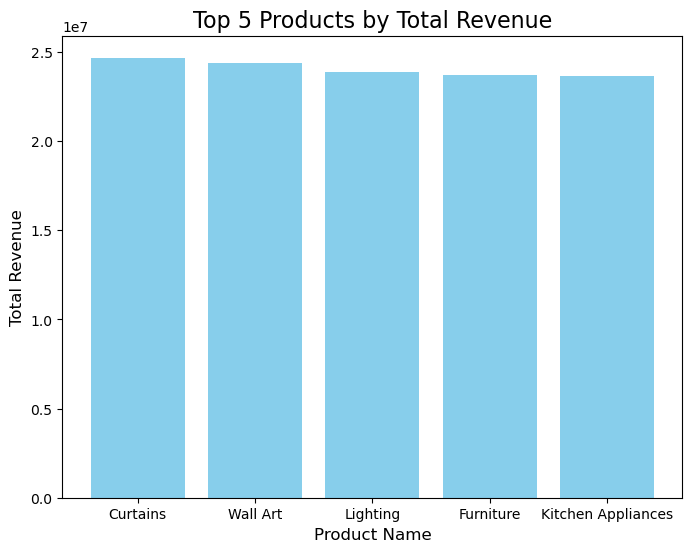

In [73]:
plt.figure(figsize = (8,6))
plt.bar(top_5_products['product_name'], top_5_products['revenue'], color = 'skyblue')
plt.xlabel('Product Name', fontsize =12)
plt.ylabel('Total Revenue', fontsize= 12)
plt.title('Top 5 Products by Total Revenue', fontsize = 16)
#plt.xticks(rotation = 45, ha = 'right')  #horizontal alignment to align the text to the right of each tick mark.
# plt.tight_layout()  #ensures everything fits neatly within the plot boundaries
plt.show()  #To render and display the plot.

### Task 2: Customer Segmentation

#### 1. Visualise the distribution of customers by age groups using a histogram or pie chart.

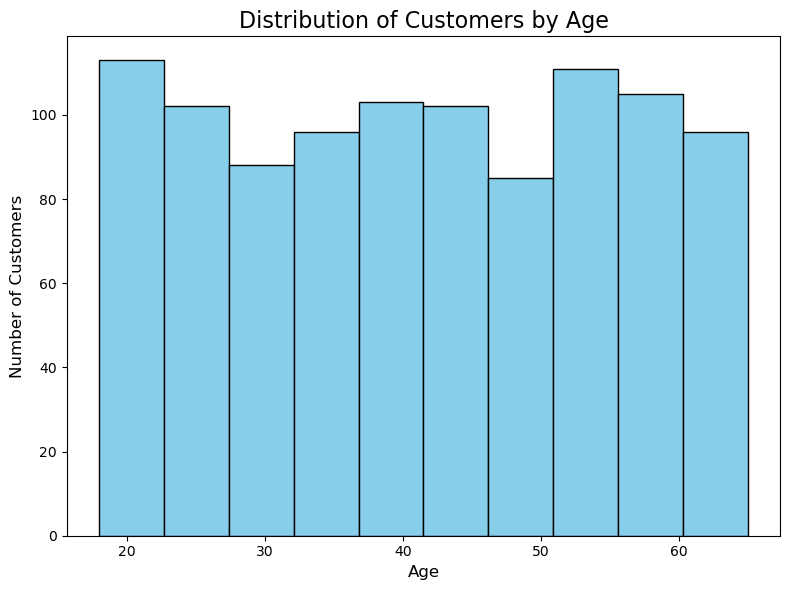

In [74]:
# Plot histogram of customer ages
plt.figure(figsize = (8,6))
plt.hist(customers['age'], bins = 10, color = 'skyblue', edgecolor= 'black')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.title('Distribution of Customers by Age', fontsize = 16)
plt.tight_layout()
plt.show()

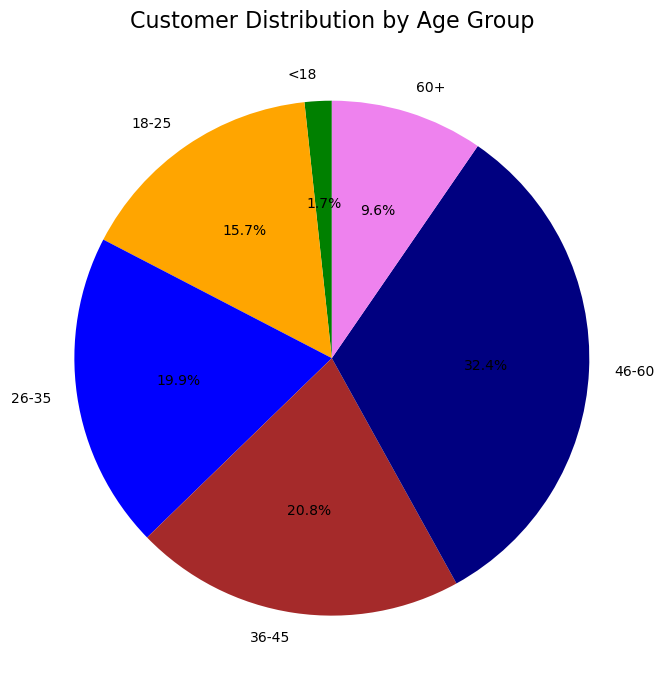

In [129]:
# Creating age groups
age_bins = [0,18,25,35, 45, 60,100]
age_labels = ['<18', '18-25', '26-35','36-45','46-60','60+']

customers['age_group'] = pd.cut(customers['age'], bins = age_bins, labels = age_labels)

# Count customers per age group
age_group_counts = customers['age_group'].value_counts().sort_index()

# pie chart
plt.figure(figsize = (7,7))
plt.pie(age_group_counts, labels = age_group_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ('green','orange','blue','brown','navy','violet','purple'))
plt.title('Customer Distribution by Age Group', fontsize= 16)
plt.tight_layout()
plt.show()

#### 2. Identify the countries with the highest number of customers and visualize the distribution of customers across countries using a horizontal bar chart.

In [124]:
# Count customers per country
country_counts = customers['country'].value_counts()

top_countries = country_counts.head(10)
country_counts


country
Colombia    280
Chile       255
Brazil      234
Mexico      232
Name: count, dtype: int64

In [125]:
top_countries

country
Colombia    280
Chile       255
Brazil      234
Mexico      232
Name: count, dtype: int64

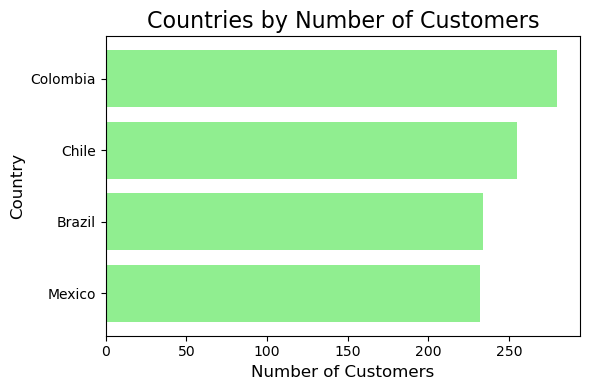

In [127]:
# Plot horizontal bar chart

plt.figure(figsize = (6,4))
plt.barh(country_counts.index, country_counts.values, color = 'lightgreen')
plt.xlabel('Number of Customers', fontsize= 12)
plt.ylabel('Country', fontsize= 12)
plt.title('Countries by Number of Customers', fontsize= 16)
plt.gca().invert_yaxis()   # Highest value on top
plt.tight_layout()
plt.show()

### Task 3: Shipping Cost Optimisation


#### 1. Calculate the average shipping cost for orders that were shipped within 3 days vs. orders shipped after 3 days.


In [136]:
# Ensure date columns are in datetime format
purchases['order_date'] = pd.to_datetime(purchases['order_date'])
purchases['shipping_date'] = pd.to_datetime(purchases['shipping_date'])
purchases.dtypes

In [154]:
# Calculate shipping duration
purchases['shipping_days'] = (purchases['shipping_date'] - purchases['order_date']).dt.days
purchases.head(1)

,order_id,customer_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date,revenue,shipping_days,shipping_category
0,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,2020-05-26,9,8.91,2020-05-29,5806.37,3,Within 3 days


In [153]:
# Create shipping category
purchases['shipping_category'] = purchases['shipping_days'].apply(lambda x : 'Within 3 days' if x <= 3 else 'After 3 days')
purchases.head(1)

,order_id,customer_id,product_name,description,price,discount,tax,order_date,quantity,shipping_cost,shipping_date,revenue,shipping_days,shipping_category
0,ODSHP00001,CS00001,Furniture,Transform your space with this stylish and fun...,645.52,0.37,0.02,2020-05-26,9,8.91,2020-05-29,5806.37,3,Within 3 days


In [156]:
# Calculate average shipping cost
avg_shipping_cost = (purchases.groupby('shipping_category')['shipping_cost'].mean().reset_index())

avg_shipping_cost

,shipping_category,shipping_cost
0,After 3 days,27.491997
1,Within 3 days,27.561145


### Task 4: Gender-based Analysis


#### 1. Compare the average income of male and female customers using a t-test.

  ● Null Hypothesis (H0 ): There is no significant difference in average income between male and female customers.
  ● Alternate Hypothesis (H1): There is a significant difference in average income between male and female customers.

In [169]:
from scipy import stats

# Separate income by gender
male_income = customers[customers['gender'] == 'Male']['income']
female_income = customers[customers['gender'] == 'Female']['income']

In [170]:
# Null Hypothesis (H0): No difference in average income
# Alternate Hypothesis (H1): Significant difference in average income

t_stat, p_value = stats.ttest_ind(male_income, female_income, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -0.245
P-value: 0.807


In [171]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: There is a significant difference in average income between genders.")
else:
    print("Fail to reject H0: No significant difference in average income between ganders.")

Fail to reject H0: No significant difference in average income between ganders.


#### 2. Determine if there is a significant association between product categories (derived from product_name) and customer gender using a Chi-Square test.

In [183]:
# Merge purchases with customers to get gender
merged = purchases.merge(customers[['customer_id', 'gender']], on = 'customer_id', how = 'left')
# Derive product category from product_name
merged['product_category'] = merged['product_name']   #.str.split().str[0]

In [186]:
# Create contingency table
contingency_table = pd.crosstab(merged['product_category'],merged['gender'])
contingency_table.head()

gender,Female,Male
product_category,,
Activewear Set,852,855
Appliance Set,839,824
Bedding,810,833
Camera,812,873
Curtains,839,856


In [188]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistics: {chi2:.3f}")
print(f"P-value: {p:.3f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistics: 22.593
P-value: 0.795
Degrees of Freedom: 29


In [189]:
if p < alpha:
    print("Reject H0: There is a significant association between product categories and genders")
else:
    print("Fail to reject H0: No significant association between product categories and genders")

Fail to reject H0: No significant association between product categories and genders


### Task 5: Correlation.

#### 1. Calculate the correlation between customer income and the total cost of their purchases.

In [198]:
customer_total_cost = purchases.groupby('customer_id')['revenue'].sum().reset_index()
customer_total_cost.rename(columns= {'revenue' : 'total_purchase_cost'}, inplace = True)
customer_total_cost.head()

,customer_id,total_purchase_cost
0,CS00001,372682.58
1,CS00002,306507.79
2,CS00003,419897.17
3,CS00004,247886.82
4,CS00005,374789.43


In [201]:
#Merge with customer income
customer_data = customer_total_cost.merge(customers[['customer_id', 'income']], on = 'customer_id', how = 'left')
customer_data.head()

,customer_id,total_purchase_cost,income
0,CS00001,372682.58,117196
1,CS00002,306507.79,49256
2,CS00003,419897.17,33434
3,CS00004,247886.82,75302
4,CS00005,374789.43,32280


In [203]:
# calculate correlation
# Pearson correlation
correlation = customer_data['income'].corr(customer_data['total_purchase_cost'])
print(f"Correlation between Income and Total purchase cost: {correlation:.3f}")

Correlation between Income and Total purchase cost: 0.022


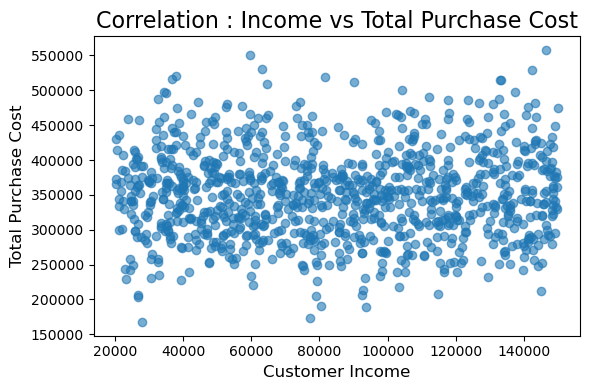

In [205]:
plt.figure(figsize =(6,4))
plt.scatter(customer_data['income'], customer_data['total_purchase_cost'], alpha = 0.6)
plt.xlabel('Customer Income',fontsize=12)
plt.ylabel('Total Purchase Cost', fontsize=12)
plt.title('Correlation : Income vs Total Purchase Cost', fontsize = 16)
plt.tight_layout()
plt.show()

### Task 6: Recommendations

#### 1. Based on the insights derived from the analysis, provide actionable recommendations to the business on: 

#### ● Optimizing product pricing, discounts, and shipping costs. 

##### Insights:

Top 5 products contribute the most to revenue (Task 1).

Orders shipped within 3 days often have higher shipping costs (Task 3).

Total purchase cost correlates positively with customer income (Task 5).

##### Recommendations:

1.Dynamic Pricing on Top Products:

Increase price slightly on top-performing products, especially for higher-income customer segments.

Consider bundling slower-moving products with high-revenue items.

2.Smart Discounts:

Offer targeted discounts on products with lower revenue contribution to boost sales.

Provide personalized discount codes to high-income customers to encourage larger purchases.

3.Shipping Cost Optimization:

Encourage early orders with incentives to improve fulfillment scheduling.

Negotiate with shipping partners to reduce costs for orders shipped within 3 days.

Introduce tiered shipping fees (fast vs standard) to balance cost and delivery speed.


#### ● Targeting specific customer segments based on demographics. 

##### Insights:

Age groups and gender distributions were analyzed (Task 2 & Task 4).

Income correlates with total purchase cost (Task 5).

##### Recommendations:

1.Segmented Marketing:

Focus promotions on age groups with the highest customer concentration.

Design gender-specific campaigns if certain product categories are preferred by male or female customers.

2.Income-Based Targeting:

Target higher-income customers with premium or high-margin products.

Offer loyalty programs or personalized recommendations to repeat high-income customers.

3.Geography-Based Strategies:

Identify countries or regions with high customer counts and target localized promotions.

#### ● Enhancing profitability by focusing on top-performing products.

##### Insights:

Top 5 products drive majority of revenue (Task 1).

Some products may have higher shipping costs affecting net profitability.

##### Recommendations:

1.Product Portfolio Optimization:

Prioritize inventory and marketing efforts on top-performing products.

Reduce investment in low-revenue products or consider bundling them to increase sales.

2.Profit Margin Analysis:

Evaluate shipping costs and discount strategies for top products to maximize profitability.

Introduce premium packaging or add-on services for high-margin products.

3.Cross-Selling & Upselling:

Recommend complementary products to customers purchasing top-performing items.

Use purchase history to create personalized product bundles that increase average order value.